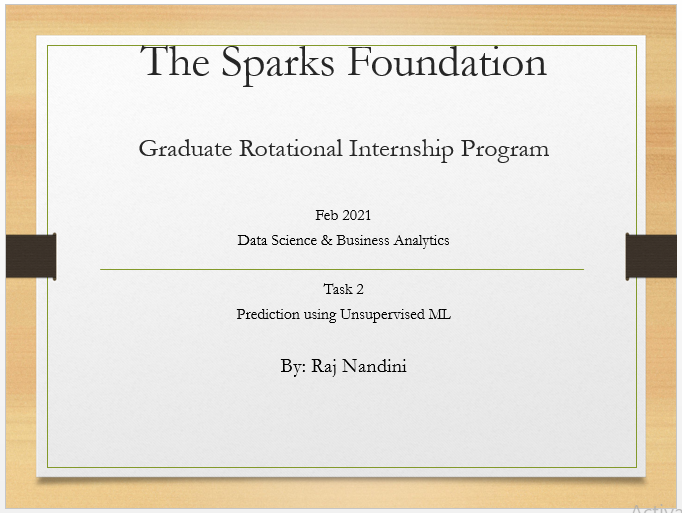

# K-Means Clustering

## TASK 2 

 **To Explore Unsupervised Machine Learning-** 

    From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

The notebook will walk through some of the basics of K-Means Clustering. 


## Submitted By : Raj Nandini

In [1]:
# Importing the Required libraries
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import datasets


In [2]:
# Reading the data 
iris_df = pd.read_csv("Iris.csv", index_col = 0)
print("Let's see a part of the whole dataset - \n")
iris_df.head()  # See the first 5 rows

Let's see a part of the whole dataset - 



,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
iris_df.shape

(150, 5)

In [3]:
print ("The info about the datset is as follows - \n")
iris_df.info()

The info about the datset is as follows - 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


As we can see there are no null values present. We can use the dataset as it is.
Let's plot a pair plot to visualise all the attributes's dependency on each other in one go.

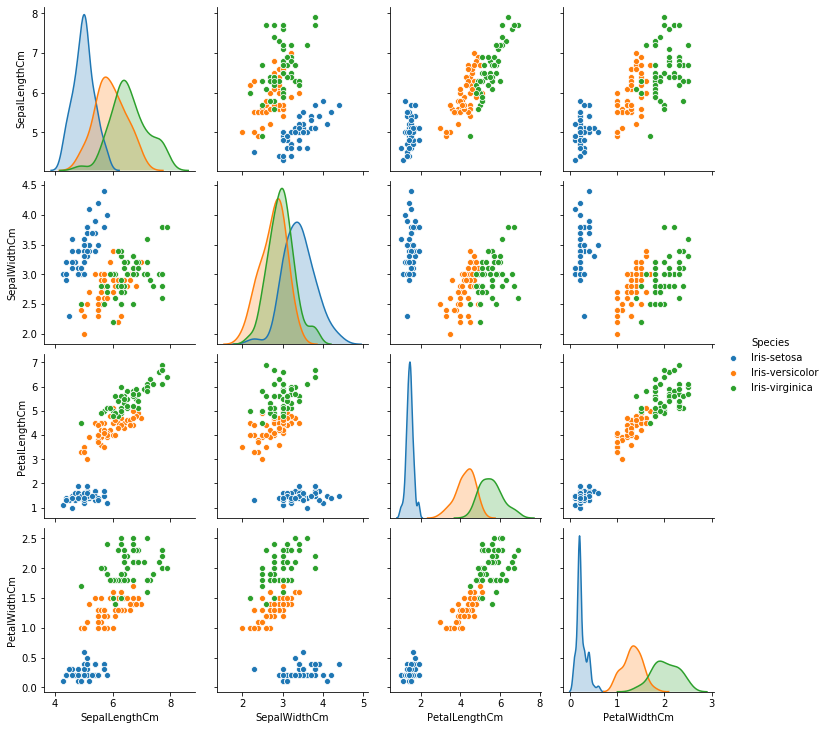

In [4]:
# Plotting the pair plot
sns.pairplot(iris_df, hue = 'Species')

We can easily observe that "iris-setosa" makes a distinctive cluster in every parameter, while the other two species are overlapping a bit on each other.

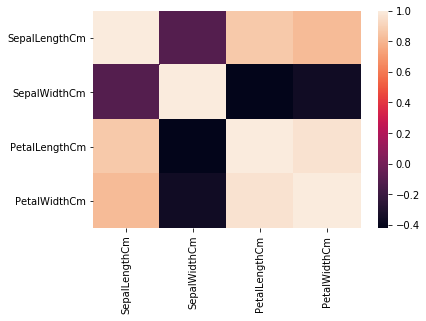

In [5]:
# correlation matrix
sns.heatmap(iris_df.corr())

Observations made - 
1. Petal length is highly related to petal width.
2. Sepal lenth is not related sepal width.

In [6]:
# Defining 'X'

X = iris_df.iloc[:, [0, 1, 2, 3]].values

**How do you find the optimum number of clusters for K Means? How does one determine the value of K?**

**Ans.** There is a popular method known as **elbow** method which is used to determine the optimal value of K to perform the K-Means Clustering Algorithm. The basic idea behind this method is that it plots the various values of cost with changing k. As the value of K increases, there will be fewer elements in the cluster.

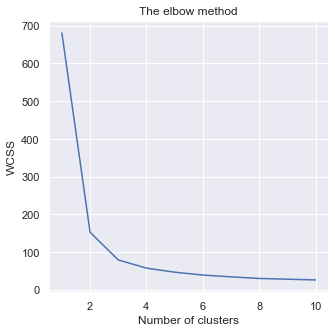

In [8]:
# Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# Allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()
sns.set(rc={'figure.figsize':(5,5)})

It can be clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

In [9]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

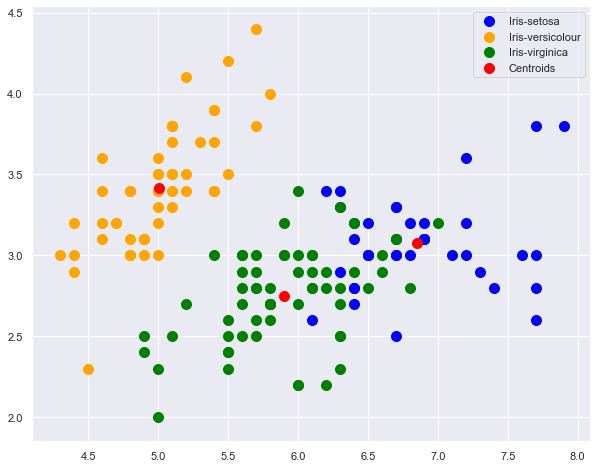

In [11]:
# Visualising the clusters - On the first two columns
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')
plt.legend()

sns.set(rc={'figure.figsize':(10,8)})

This Concludes this notebook

# Thank You For Watching